In [1]:
import pandas as pd
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_excel("selic_hist_190325.xls", header=0)
display(df)
display(df.dtypes)

,data_copom,selic
0,19/03/2025,"14,25"
1,29/01/2025,"13,25"
2,2024-11-12 00:00:00,"12,25"
3,2024-06-11 00:00:00,"11,25"
4,18/09/2024,"10,75"
...,...,...
272,23/10/1996,"1,78"
273,23/09/1996,"1,82"
274,21/08/1996,"1,88"
275,30/07/1996,"1,90"


data_copom    object
selic         object
dtype: object

In [5]:
import pandas as pd

# Supondo que o seu DataFrame se chame df:
# Exemplo do DataFrame já carregado
print(df.dtypes)

# Converter a coluna 'data copom' para datetime
df['data_copom'] = pd.to_datetime(df['data_copom'], errors='coerce', dayfirst=True)

# Substituir vírgulas por pontos na coluna 'selic' e converter para float
df['selic'] = df['selic'].str.replace(',', '.').astype(float)

# Ordenar o DataFrame pela coluna 'data_copom' em ordem crescente
df = df.sort_values(by='data_copom', ascending=True)

# Reseta o índice para que fique contínuo (opcional, mas útil)
df.reset_index(drop=True, inplace=True)



# Confirmar as conversões
display(df.dtypes)
display(df.head(20))

data_copom    object
selic         object
dtype: object


data_copom    datetime64[ns]
selic                float64
dtype: object

,data_copom,selic
0,1996-06-26,1.90
1,1996-07-30,1.90
2,1996-08-21,1.88
3,1996-09-23,1.82
4,1996-10-23,1.78
5,1996-11-27,1.74
6,1996-12-18,1.70
7,1997-01-22,1.66
8,1997-02-19,1.62
9,1997-03-19,1.58


In [7]:
import sqlite3

# Conectar ao banco SQLite
conn = sqlite3.connect('SqCenarios.db')

try:
    # Inserir os dados do DataFrame no banco de dados
    df.to_sql('tbselichist', conn, if_exists='append', index=False)
    print("Dados inseridos com sucesso na tabela 'tbselichist'.")
except Exception as e:
    print("Erro ao inserir os dados:", e)
finally:
    conn.close()

Dados inseridos com sucesso na tabela 'tbselichist'.


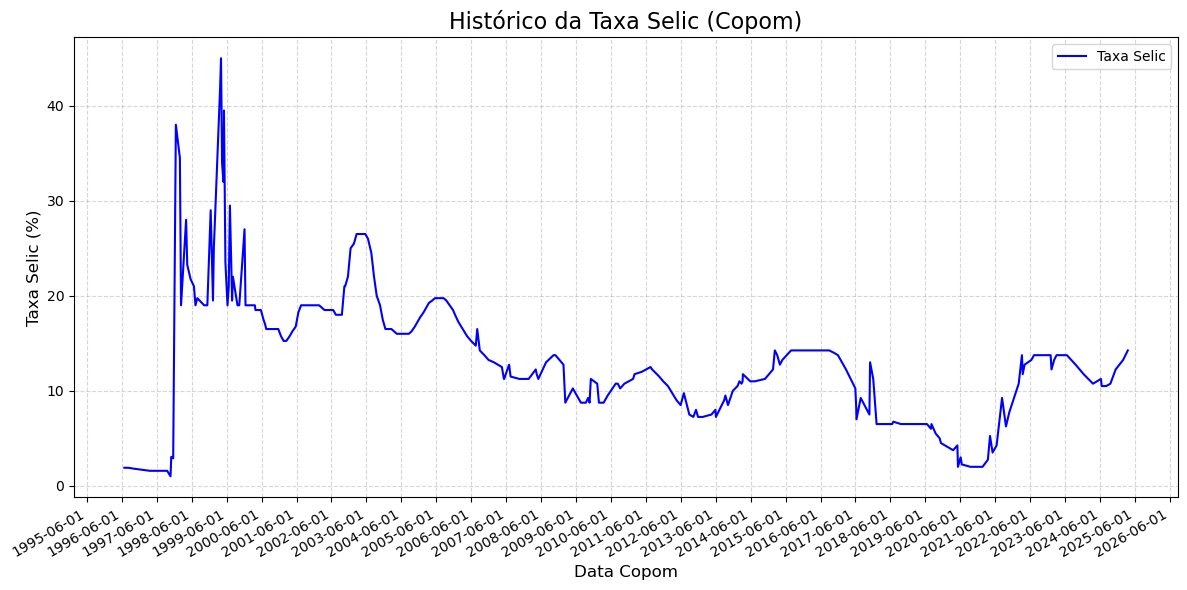

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Certifique-se de que a coluna 'data_copom' está no formato datetime
df['data_copom'] = pd.to_datetime(df['data_copom'])

# Configurar o gráfico
plt.figure(figsize=(12, 6))  # Tamanho do gráfico
plt.plot(df['data_copom'], df['selic'], linestyle='-', color='b', label='Taxa Selic')

# Configurar o eixo X para exibir as datas com espaçamento proporcional
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato das datas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))  # Marcador a cada 6 meses (ajuste conforme necessário)
plt.gcf().autofmt_xdate()  # Rotaciona os rótulos automaticamente para caber no gráfico

# Adicionar título e rótulos
plt.title('Histórico da Taxa Selic (Copom)', fontsize=16)
plt.xlabel('Data Copom', fontsize=12)
plt.ylabel('Taxa Selic (%)', fontsize=12)

# Adicionar grade para melhor leitura
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()  # Exibir legenda

# Ajustar layout para evitar corte
plt.tight_layout()

# Mostrar o gráfico
plt.show()